In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Agent:

    def __init__(self, positionState, epsilon, target, size, condition):
        self.QTable =  np.zeros((size, size, 4))
        self.positionState = positionState
        self.epsilon = epsilon
        self.target = target
        self.size = size
        self.running = condition
        self.dead = False

    def rewardFunction(self, new_x, new_y, movement):

        distance1 = np.sqrt((self.positionState[0] - self.target[0])**2 + (self.positionState[1] - self.target[1])**2)
        distance2 = np.sqrt((new_x - self.target[0])**2 + (new_y- self.target[1])**2)

        if new_x == self.target[0] and new_y == self.target[1]:
            self.running = False
        elif self.dead == True:
            self.QTable[self.positionState[0]][self.positionState[1]][movement] -= 10
        elif distance1 > distance2:
            self.QTable[self.positionState[0]][self.positionState[1]][movement] += 1
        else:
            self.QTable[self.positionState[0]][self.positionState[1]][movement] -= 1
    
    def move(self, movement):
        actualMove = movement
        x = self.positionState[0]
        y = self.positionState[1]

        if actualMove == 0:
            x -= 1
        elif actualMove == 1:
            y -= 1 
        elif actualMove == 2:
            x += 1
        elif actualMove == 3:
            y += 1

        if x >= self.size or x < 0 or y >= self.size or y < 0:
            self.running = False
            self.dead = True
            
       #print("(" + str(self.positionState[0]) + ", " + str(self.positionState[1]) + ") Moved: " + str(actualMove)   + " to: (" + str(x) + ", " + str(y) + ")" )
        self.rewardFunction(x, y , actualMove)
        self.positionState[0] = x
        self.positionState[1] = y


    def Action(self):
        possibleActions = self.QTable[self.positionState[0]][self.positionState[1]]
        explore = np.random.uniform(0,1)
        if explore < self.epsilon:
            rand = np.random.randint(0,possibleActions.size)
            self.move(rand)
        else:
            action = np.argmax(possibleActions)
            self.move(action)


In [9]:
numEpochs = 1000
size =100
x = 2
y = 2
position = np.array([x,y])
target = np.array([67,92])


agent = Agent(position, 0.2, target, size, True)

moves = np.zeros((numEpochs))
for i in range(numEpochs):
    counter = 0
    agent.positionState[0] = x
    agent.positionState[1] = y

    agent.target = target
    agent.running = True
    agent.dead = False

    while agent.running:
        if agent.epsilon > 0.01:
            agent.epsilon -= 0.01
        agent.Action()
        counter += 1
    moves[i] = counter
    


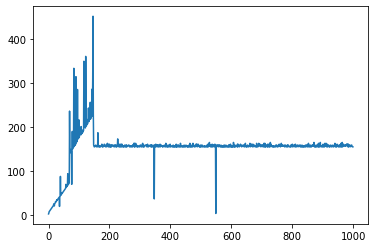

In [12]:

plt.plot(moves)
plt.show()


In [ ]:
class Agent:

    def __init__(self, positionState, epsilon, target, size, condition, map):
        self.QTable =  np.zeros((size, size, 4))
        self.positionState = positionState
        self.epsilon = epsilon
        self.target = target
        self.size = size
        self.running = condition
        self.dead = False
        self.map = map

    def rewardFunction(self, new_x, new_y, movement):
        distance1 = np.sqrt((self.positionState[0] - self.target[0])**2 + (self.positionState[1] - self.target[1])**2)
        distance2 = np.sqrt((new_x - self.target[0])**2 + (new_y- self.target[1])**2)

        if new_x == self.target[0] and new_y == self.target[1]:
            self.running = False
        elif self.dead == True:
            self.QTable[self.positionState[0]][self.positionState[1]][movement] -= 10
        elif distance1 > distance2:
            self.QTable[self.positionState[0]][self.positionState[1]][movement] += 1
        else:
            self.QTable[self.positionState[0]][self.positionState[1]][movement] -= 1
    
    def move(self, movement):
        actualMove = movement
        x = self.positionState[0]
        y = self.positionState[1]

        if actualMove == 0:
            x -= 1
        elif actualMove == 1:
            y -= 1 
        elif actualMove == 2:
            x += 1
        elif actualMove == 3:
            y += 1

        if x >= self.size or x < 0 or y >= self.size or y < 0:
            self.running = False
            self.dead = True
            
       #print("(" + str(self.positionState[0]) + ", " + str(self.positionState[1]) + ") Moved: " + str(actualMove)   + " to: (" + str(x) + ", " + str(y) + ")" )
        self.rewardFunction(x, y , actualMove)
        self.positionState[0] = x
        self.positionState[1] = y


    def Action(self):
        possibleActions = self.QTable[self.positionState[0]][self.positionState[1]]
        explore = np.random.uniform(0,1)
        if explore < self.epsilon:
            rand = np.random.randint(0,possibleActions.size)
            self.move(rand)
        else:
            action = np.argmax(possibleActions)
            self.move(action)
